Test without beam offset with Au/sapphire at 80K and 300K

{'thickness': 0.005, 'temperature': 80, 'material': <pyFDTR.materials.sapphire object at 0x7f01b06ace80>, 'cp': 0.09688563840000002, 'density': 3.97, 'kxx': 6.702924687620913, 'kyy': 6.702924687620913, 'kxy': 0, 'kzz': 6.702924687620913}
{'temperature': 80, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 2000.0}
{'thickness': 6e-06, 'temperature': 80, 'material': <pyFDTR.materials.gold object at 0x7f01b08e8ac0>, 'cp': 1.97792201038336, 'density': 19.3, 'kxx': 0.6839953648000001, 'kyy': 0.6839953648000001, 'kxy': 0, 'kzz': 0.6839953648000001}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f01f7dd2f50>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01b57aba30>, 'cp': 2.4

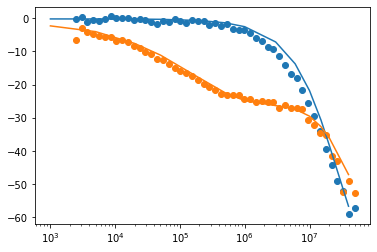

In [5]:
#import required libraries. You might need to install sympy, mpmath, numpy, scypy, matplotlib etc..
#e.g. do it using "conda install sympy" (if using conda) or "pip install sympy"
# 
# 
# 
# Use everthing in cm, like W/cmK. It is necessary to avoid numerical overflow 

import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt



load = np.genfromtxt('./sampledata/sapphire-gold60nm_80K.txt',skip_header=2) #load the exprimental files removing the header
points80k = np.delete(load,1,1) #keep only frequency and phase columns

load = np.genfromtxt('./sampledata/sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)


frequencies = [1e3,5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6] #The frequencies to be calculated in the model

#Here we define the model
domain = Domain(80) #The argument is the temperature: 80K
domain.add_substrate(sapphire) #Add a substrate first it has the thickness = 100um, adiabatic boundary conditions are applied, the argument is a material in the library (materilas.py)
domain.add_layer(60e-7,gold) #Add the following layers first the thickness (in cm remember...) then the material
domain.set_interface_condu(1,2e3) #Set the interface TBC of the interface just created, they a numerated from bottom to top

#It is like this:
#Surface
#Au - 60nm
#Interface 1
#Substrate

#now we create the model
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0) #first the domain object, then pump radius, the probe radius, and the offset between the pump and the probe, default is 0

#printing thing to check...
print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

#calculate the phase for each frequency
phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

#lets repeat it for 300K
domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
#if you want to change the material parameters use set_layer_param like below
#domain.set_layer_param(1,kzz=33.6,kxx=33.6)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)
#layers are also numered from bottom to top

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))

#matlibplot to plot the results
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_80);  # Plot calculated values
ax.semilogx(frequencies, phases_300);   
ax.scatter(points80k[:,0],points80k[:,1]) #plot the experimental
ax.scatter(points300k[:,0],points300k[:,1])

Test beam offset in Au/Sapphire

{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f01b07bbac0>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01b07bb9d0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f01b569e650>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01b2baa770>, 'cp': 2.494334686, 'density': 

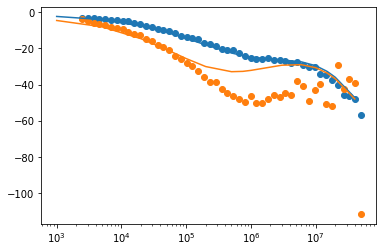

In [4]:
#Just like above with beam offset
#The model does not work so well...

import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 15

load = np.genfromtxt('./sampledata/subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)

load = np.genfromtxt('./sampledata/subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)

#frequencies = points00um[:,0]
frequencies = [1e3,5e3,20e3,50e3,100e3,200e3,500e3,750e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_00 = []
for f in frequencies:
  phases_00.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,5e-4,4.5e-4,5e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase(f))


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_00);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.scatter(points00um[:,0],points00um[:,1])
ax.scatter(points05um[:,0],points05um[:,1])

Test the Liquid cell model. Comparison between air, water and IPA

{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.Air object at 0x7f01b58e7fa0>, 'cp': 0.000879183, 'density': 0.001225, 'kxx': 0.000259, 'kyy': 0.000259, 'kxy': 0, 'kzz': 0.000259}
{'temperature': 300, 'materialname_1': 'Air', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01b58ccee0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.Water object at 0x7f01b58cc4f0>, 'cp': 4.18, 'density': 1.0, 'kxx': 0.00598, 'kyy': 0.00598, 'kxy': 0, 'kzz': 0.00598}
{'temperature': 300, 'materialname_1': 'Water', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01b292efe0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}


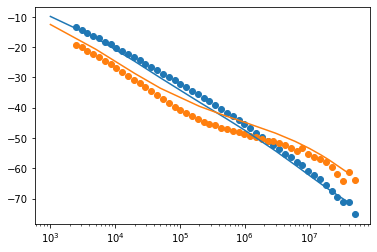

In [3]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

domain = Domain(300)
domain.add_substrate(Air)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)

#here we add a layer above the transducer, with is very similar we used before
domain.add_toplayer(50e-4,glass) 
domain.set_top_interface_condu(1,5e3)
#Also numered bottom to top
model = FourierModelFDTR(domain,5e-4,4.5e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase_mpmath(f)) #Sorry, due to numerical issues we need to use mpmath version, which has more numerical precision to avoid round errors and overflow but is slower

domain = Domain(300)
domain.add_substrate(Water)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
domain.add_toplayer(50e-4,glass)
domain.set_top_interface_condu(1,5e3)
model = FourierModelFDTR(domain,5e-4,4.5e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_20 = []
for f in frequencies:
  phases_20.append(model.get_phase_mpmath(f))


load = np.genfromtxt('./sampledata/liquids_air2.txt',skip_header=2)
pointsair= np.delete(load,1,1)

load = np.genfromtxt('./sampledata/liquids_water.txt',skip_header=2)
pointsIPA = np.delete(load,1,1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_20);  # Plot some data on the axes.
ax.scatter(pointsair[:,0],pointsair[:,1])
ax.scatter(pointsIPA[:,0],pointsIPA [:,1])




How to fit parameters

In [8]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

#We use lmfit library, do not forget to install it too
import lmfit
from lmfit import minimize, Parameters

#define a list of parameters object
params = Parameters()
#add parameters in the fit (name, starting value, min and max)
params.add('kz', value=0.40, min=0.10, max=0.70)


load = np.genfromtxt('./sampledata/sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

#Here we define our error function, replace the parameters that you want to vary with params['name'].value
def residuals(params,freq,measured):
    domain = Domain(300)
    domain.add_substrate(sapphire)
    domain.add_layer(60e-7,gold)
    domain.set_interface_condu(1,5e3)
    domain.set_layer_param(0,kzz=params['kz'].value)
    model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)
    phase=[]
    for i,f in enumerate(freq):
        phase.append(model.get_phase(f))
    return phase - measured

#run the fit and hope for the best
#you can reduce the number of points to select frequencies and speed up. In numpy arrays. array[starting:last:step] (e.g. points300k[25::5,0] gets 1 in 5 points in the last 25 points)
out = minimize(residuals, params, args=(points300k[25::5,0],points300k[25::5,1]), method='differential_evolution')
#different methods not tested yet, find yourself the best one
lmfit.report_fit(out)

[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 81
    # data points      = 5
    # variables        = 1
    chi-square         = 7.20788579
    reduced chi-square = 1.80197145
    Akaike info crit   = 3.82868881
    Bayesian info crit = 3.43812673
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    kz:  0.27230436 (init = 0.4)


In [9]:
#Using jupyter you can always check the variables values
points300k[25,0]

431152.41

Sensitivity

{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f01aee37460>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01aefad0c0>, 'cp': 2.494334686, 'density': 19.3, 'kxx': 0.660214005, 'kyy': 0.660214005, 'kxy': 0, 'kzz': 0.660214005}
{'thickness': 0.005, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f01b2cc49d0>, 'cp': 3.0740928999999997, 'density': 3.97, 'kxx': 0.3315190107105972, 'kyy': 0.3315190107105972, 'kxy': 0, 'kzz': 0.3315190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 5000.0}
{'thickness': 6.6e-06, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f01aefac940>, 'cp': 2.494334686, 'density'

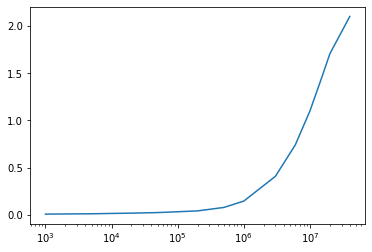

In [11]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt


mpmath.mp.dps = 5

load = np.genfromtxt('./sampledata/sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sampledata/sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

frequencies = [1e3,5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(66e-7,gold)
domain.set_interface_condu(1,5e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))

#Sensitivity is just the difference change that parameter
difference = np.array(phases_80)-np.array(phases_300) #converting to nparray just to do the math quickly

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, difference);  # Plot some data on the axes.
